# Exploratory Data Analysis

In this notebook, we are going to anaylze the data. With the help of this analysis I will have a better understanding of my listening taste.

In [1]:
# import required packages
%pip install calplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import calplot
sns.set()

Note: you may need to restart the kernel to use updated packages.


# 1. My Streaming History

In this section, I am going to analyse my behaviour and personality with the help of my music listening history. Here I am using my spotify listening history. I first started using spotify in 2019 and still continue to listen songs on it. Hence in the past 2 year I have generated a huge amount of data which will be enough for analysis. 

In [2]:
# reading the dataset in dataframe
my_streaming = pd.read_csv('./data/song_data.csv')
my_streaming = my_streaming.drop(columns=['Unnamed: 0'])
my_streaming.head(3)

,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature,albumName,albumID
0,Theory of a Deadman,Angel,1187,2021-03-12 05:39:00,0.559,0.559,11,-6.425,1,0.0358,0.0145,0.0,0.138,0.338,72.498,2m6Ko3CY1qXNNja8AlugNc,4,Angel Baby,44CdsgXhU5R2esprq0tf43
1,Phillip Phillips,"Gone, Gone, Gone",1292,2021-03-12 05:39:00,0.664,0.642,6,-5.961,1,0.0380,0.1290,0.0,0.114,0.501,118.002,2qHiyBpxyOXnRGG3t2iE96,4,The World From The Side Of The Moon,0mVaaNSEcExh4rejUpiSj6
2,Theory of a Deadman,Angel,202213,2021-03-12 05:43:00,0.559,0.559,11,-6.425,1,0.0358,0.0145,0.0,0.138,0.338,72.498,2m6Ko3CY1qXNNja8AlugNc,4,Angel Baby,44CdsgXhU5R2esprq0tf43


## How often did I listen music?

In this visualization, I will determine that everday for how long I used to listen to music. This plot is similar to a plot on github which shows us the number of commits we make everyday, but, here I will be showing the amount time (in minutes) I listened to music.

In [3]:
my_streaming['mins_played'] = my_streaming.apply(lambda x: round(x['msPlayed']/60000,2), axis=1)
my_streaming['date'] = my_streaming.apply(lambda x: pd.to_datetime(x['datetime'][:10],format='%Y-%m-%d'),axis=1)

daily_length = my_streaming.groupby('date',as_index=True).sum()

In [4]:
idx = pd.DataFrame(pd.date_range(min(my_streaming.date), max(my_streaming.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

new_daily_length = pd.merge(idx, daily_length, how='left', left_on='date', right_on = 'date', copy=False)
new_daily_length.head(3)

,date,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mins_played
0,2021-03-12,11738442.0,59.916,67.994,493.0,-705.079,94.0,5.1213,21.669600,0.077006,16.4344,40.545,12355.021,428.0,195.64
1,2021-03-13,11667802.0,59.172,67.358,491.0,-691.582,97.0,4.7976,22.701197,0.092496,15.5861,39.049,12334.100,420.0,194.39
2,2021-03-14,6236955.0,25.818,30.410,199.0,-301.037,40.0,2.1062,9.337360,0.046203,6.9761,17.690,5335.139,188.0,103.94


In [5]:
new_daily_length = new_daily_length.drop(new_daily_length.loc[:, 'msPlayed':'time_signature'], axis=1)

new_daily_length.index = new_daily_length.date

new_daily_length = new_daily_length.drop(columns=['date'])
new_daily_length.head(3)

,mins_played
date,
2021-03-12,195.64
2021-03-13,194.39
2021-03-14,103.94


In [6]:
# converting the dataframe into series for calplot
new_daily_length = new_daily_length.squeeze()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 1440x720 with 3 Axes>,
 array([<AxesSubplot:ylabel='2021'>, <AxesSubplot:ylabel='2022'>],
       dtype=object))

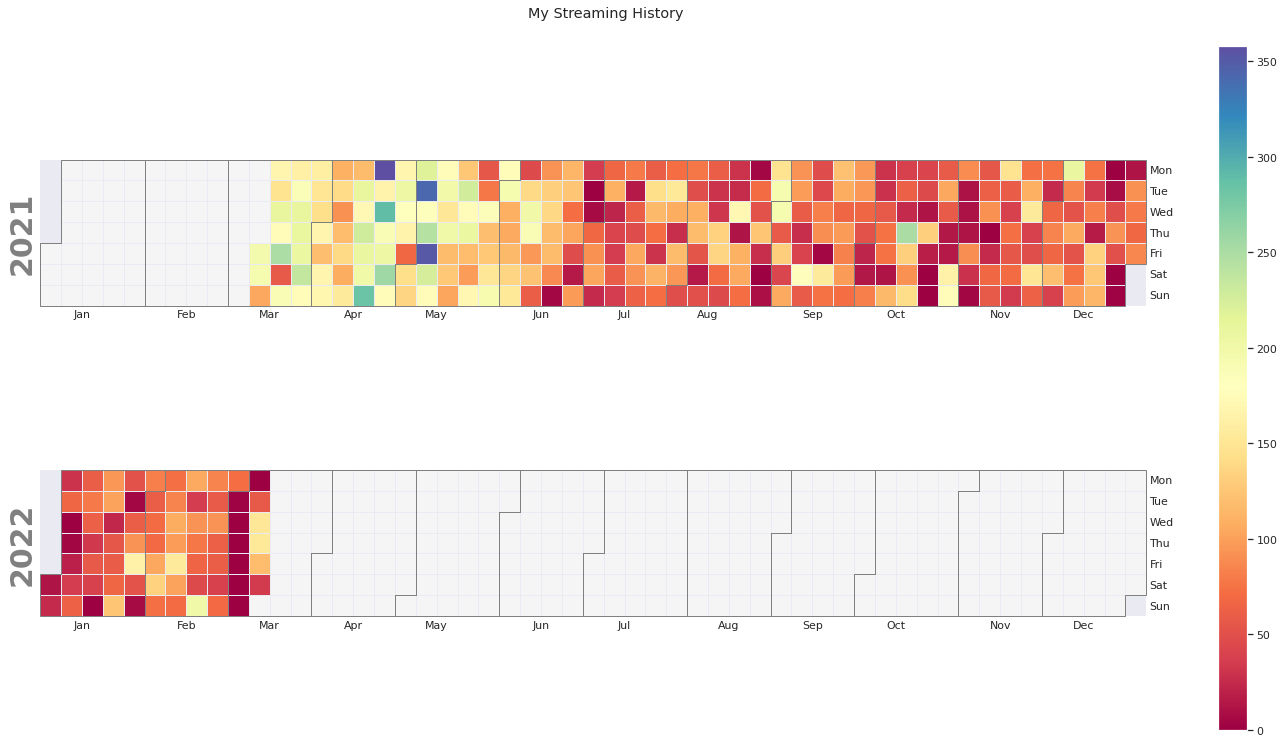

In [7]:
calplot.calplot(new_daily_length, figsize=(20,10), suptitle='My Streaming History', cmap='Spectral' )

I listen to music everyday when I used to travel to my college. As per the graph, everyday I used to listen to songs from 5-80 mins. However, there were days when I listened to music for more than 100 mins as well. Morover, many days I never listened to music as well, this is probably because I might be late for my college and I never had the time to plug in. Then since April 2020 lockdown was imposed, and at home I listened for less amount of time (approx less than 30 minutes). However, there were a few days when I would listen for more than an hour.

## My favourite artists

Here I will be plotting a graph to determine my most heard artist in this past year. 

In [12]:
artist_length = my_streaming.groupby('artistName',as_index=False).sum()
artist_song_cnt = my_streaming.groupby('artistName',as_index=False).agg({"trackName": "nunique"})

In [13]:
artist_length_uniqsong = pd.merge(artist_length,artist_song_cnt,how='left',on='artistName',copy=False)
artist_length_uniqsong.rename(columns={'trackName':'unique_track_number'},inplace=True)
artist_length_uniqsong.head(3)

,artistName,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mins_played,unique_track_number
0,2021 Wrapped,21122,0.728,0.783,11,-4.424,0,0.2660,0.23700,0.0,0.434,0.555,77.011,4,0.35,1
1,3 Doors Down,12683176,38.364,37.605,690,-466.992,0,1.7595,4.38150,0.0,8.556,13.317,9935.379,276,211.42,1
2,5 Seconds of Summer,3319740,29.249,35.745,356,-277.567,58,2.5297,2.46221,0.0,9.333,23.626,8720.451,202,55.29,5


In [14]:
max_time  = artist_length_uniqsong.sort_values(by=['mins_played'])
max_time.tail()

,artistName,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mins_played,unique_track_number
826,The Score,48745464,180.988,255.091,1522,-1930.187,69,16.4782,21.698553,0.037280,52.1659,155.1630,36601.581,1400,812.87,17
614,Parachute,49843578,188.925,255.546,1947,-2330.020,339,12.0048,25.794770,0.010113,49.1221,143.1380,37839.739,1444,830.74,5
522,Martin Garrix,87740315,321.717,383.043,3159,-3471.094,328,24.6211,107.508890,14.783126,106.9702,205.9627,72313.115,2386,1462.93,23
438,Kygo,106009714,516.895,500.480,3908,-6085.946,689,57.3299,224.588700,1.567508,108.8140,345.1215,100251.485,3234,1767.05,33
339,Imagine Dragons,336822793,1099.638,1416.968,9132,-13454.033,1627,116.2604,146.040279,26.905001,406.1073,630.7539,274297.301,8314,5614.90,40


In [15]:
most_heard_30 = max_time.tail(30)

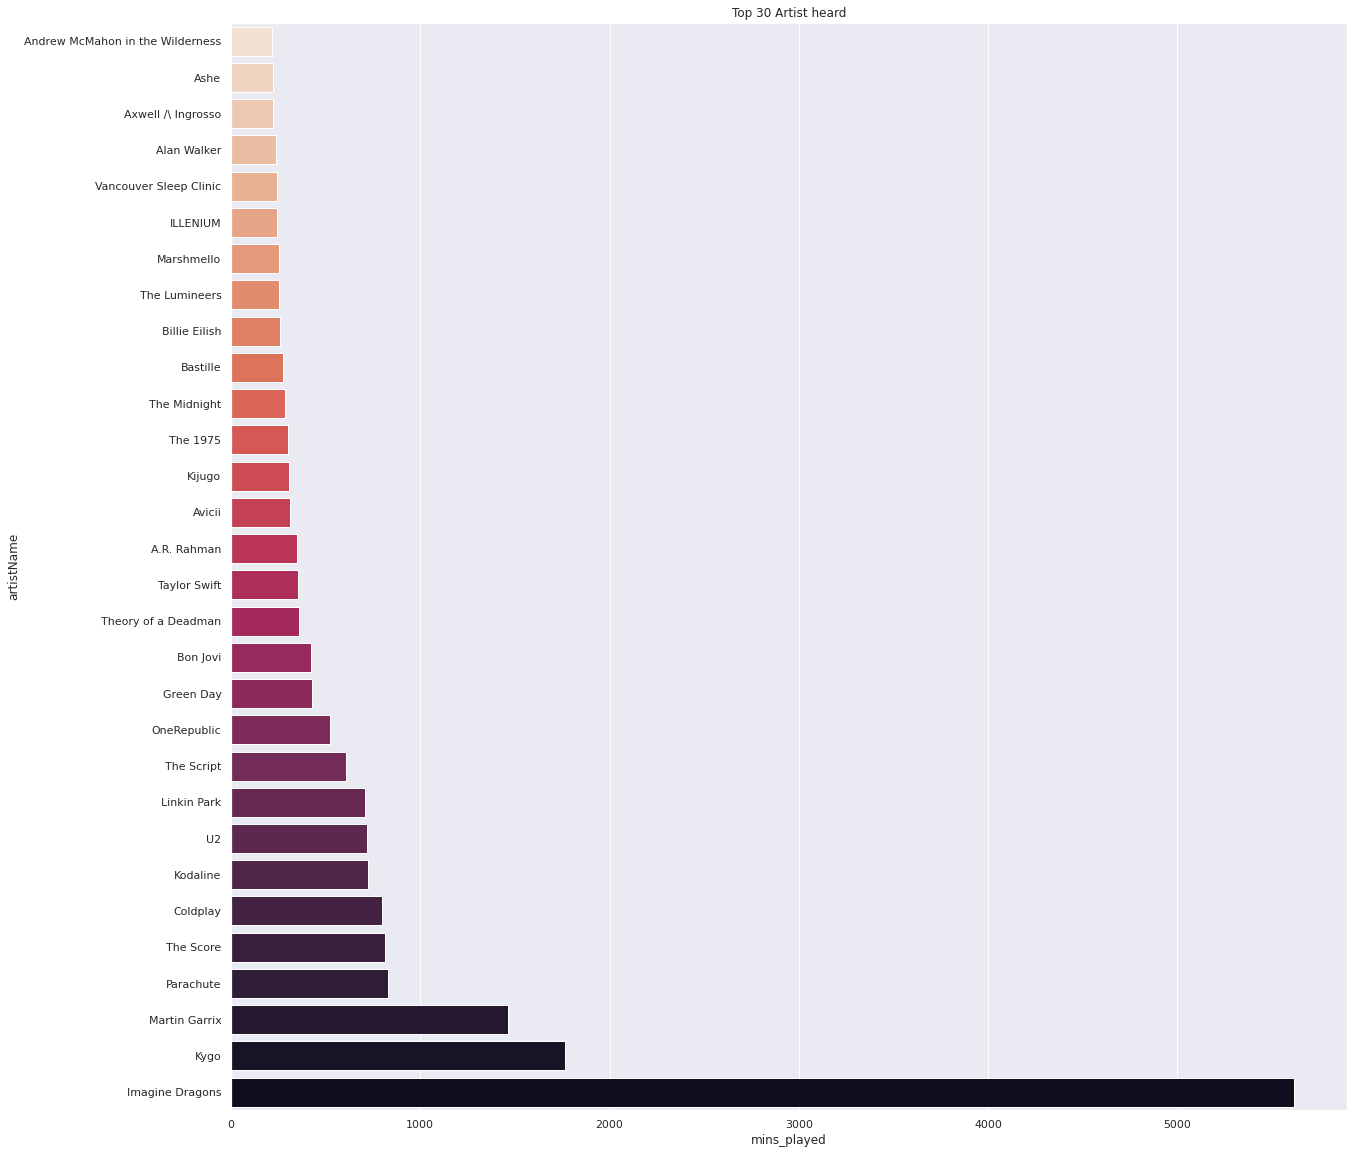

In [16]:
plt.rcParams["figure.figsize"] = (20,20)
sns.barplot(y = most_heard_30['artistName'], x = most_heard_30['mins_played'], palette='rocket_r')
plt.title('Top 30 Artist heard')
plt.show()

Since the bar graph could only show 30 artist clearly. In the next plot, I have made a word cloud, where I am representing my top 100 artists  with no compromise in clarity.

In [17]:
# converted df to dict
artist_freq = dict(zip(artist_length_uniqsong['artistName'].tolist(), artist_length_uniqsong['mins_played'].tolist()))

     |████████████████████████████████| 371 kB 205 kB/s eta 0:00:01


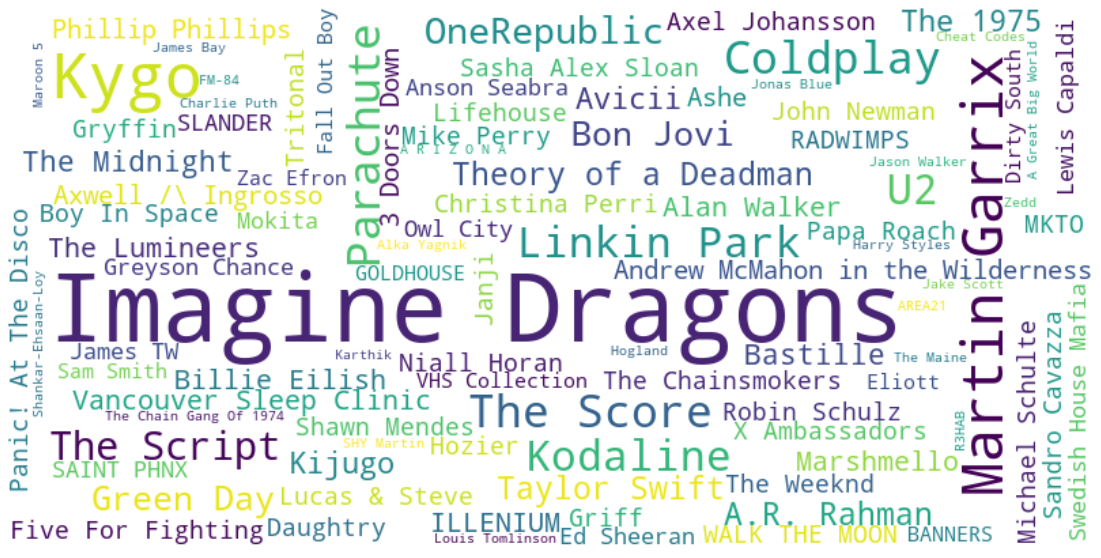

In [19]:
!pip3 install wordcloud
from wordcloud import WordCloud

wc = WordCloud(background_color='white',width=800, height=400, max_words=100).generate_from_frequencies(artist_freq)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

The wordcloud contains names of 100 artists. The larger and more distinct an artist name is, the more i listened to that artist.

List of artists with >= 5 songs which I listened.

In [20]:
max_songs = artist_length_uniqsong.loc[artist_length_uniqsong['unique_track_number'] > 5]

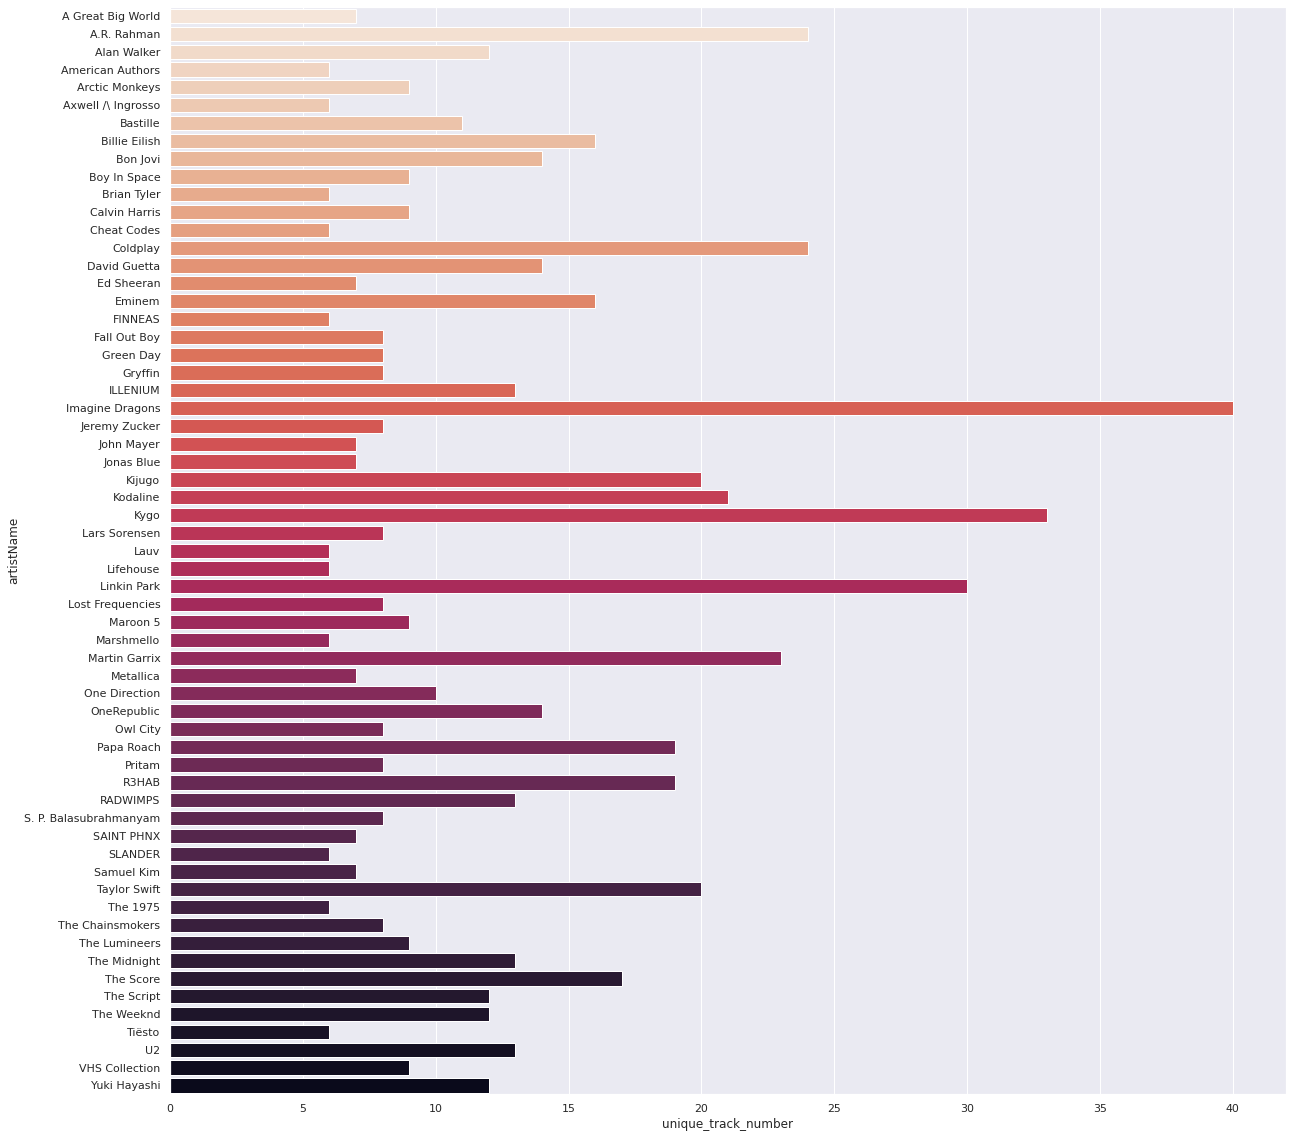

In [21]:
sns.barplot(y = max_songs['artistName'], x = max_songs['unique_track_number'], palette='rocket_r')
plt.rcParams["figure.figsize"] = (20,20)

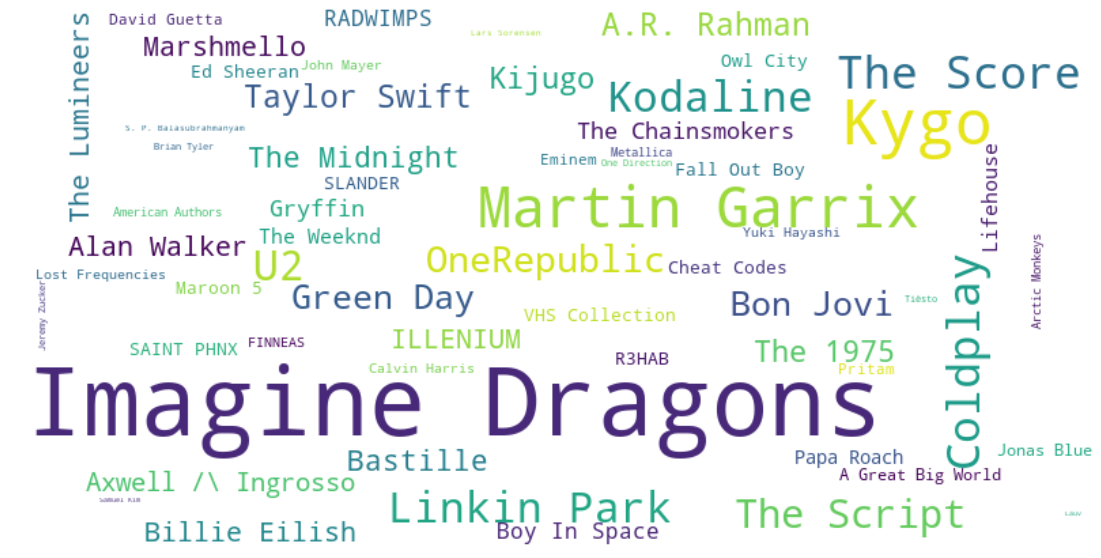

In [35]:
wc = WordCloud(background_color='white',width=800, height=400, max_words=100).generate_from_frequencies(dict(zip(max_songs['artistName'].tolist(), max_songs['msPlayed'].tolist())))
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## My mood throughout the year.

In [36]:
my_streaming.columns

Index(['artistName', 'trackName', 'msPlayed', 'datetime', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id',
       'time_signature', 'albumName', 'albumID', 'mins_played', 'date'],
      dtype='object')

In [37]:
# create new date series for displaying time series data
idx = pd.DataFrame(pd.date_range(min(my_streaming.date), max(my_streaming.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

In [38]:
valence = my_streaming.groupby('date')['valence'].aggregate(['min', np.mean, 'max'])

In [39]:
val = pd.merge(idx, valence, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)
val.head()

,date,min,mean,max
0,2021-03-12,0.125,0.378925,0.887
1,2021-03-13,0.125,0.371895,0.711
2,2021-03-14,0.125,0.376383,0.711
3,2021-03-15,0.125,0.384310,0.711
4,2021-03-16,0.125,0.363788,0.711


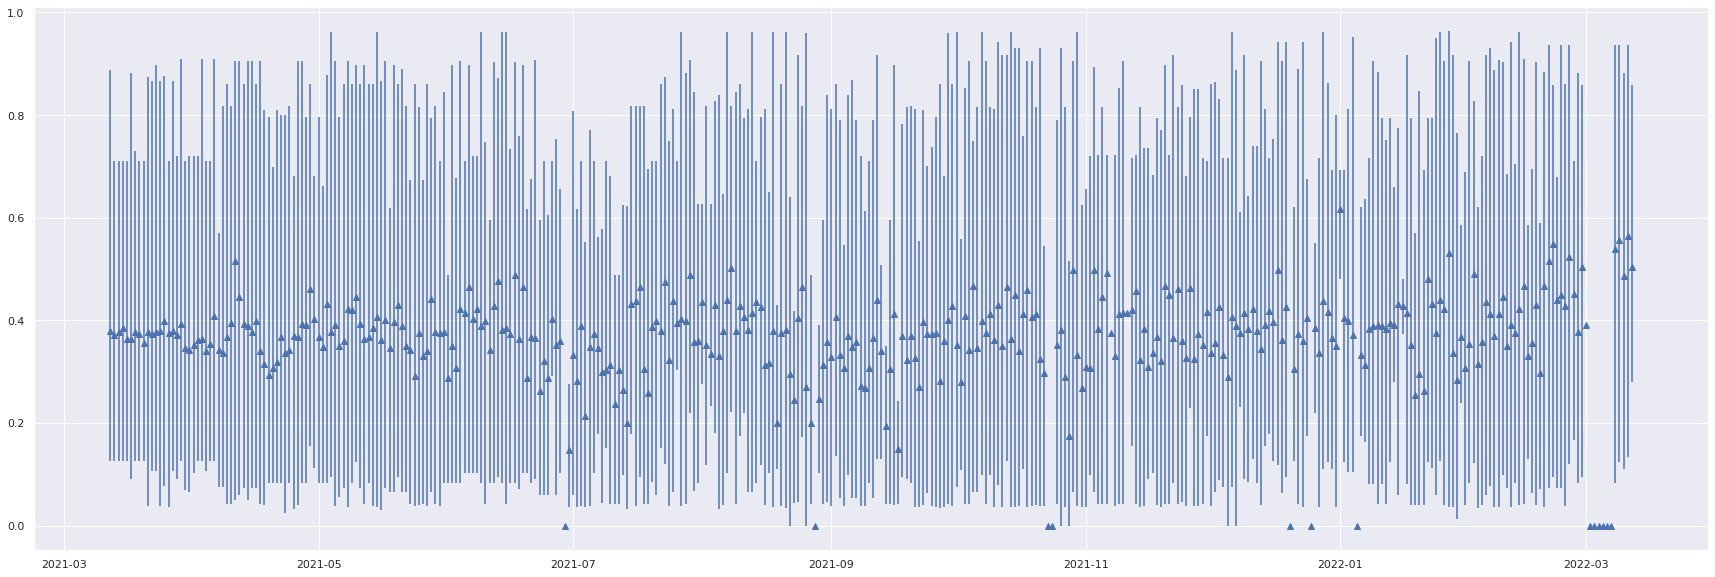

In [43]:
plt.rcParams["figure.figsize"] = (30,10)
plt.errorbar(val["date"],val["mean"], [val["mean"] - val['min'],val['max']-val["mean"]], linestyle='None',marker='^')
plt.show()

As you can see I listened to you all tpes of music be it a happy music or sad music.

Now we analyse the dancebility and energy in the music data we have from a user

In [44]:
energy = my_streaming.groupby('date')['energy'].aggregate(['min', np.mean, 'max'])
dance = my_streaming.groupby('date')['danceability'].aggregate(['min', np.mean, 'max'])

In [45]:
d = pd.merge(idx, energy, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)
e = pd.merge(idx, dance, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)

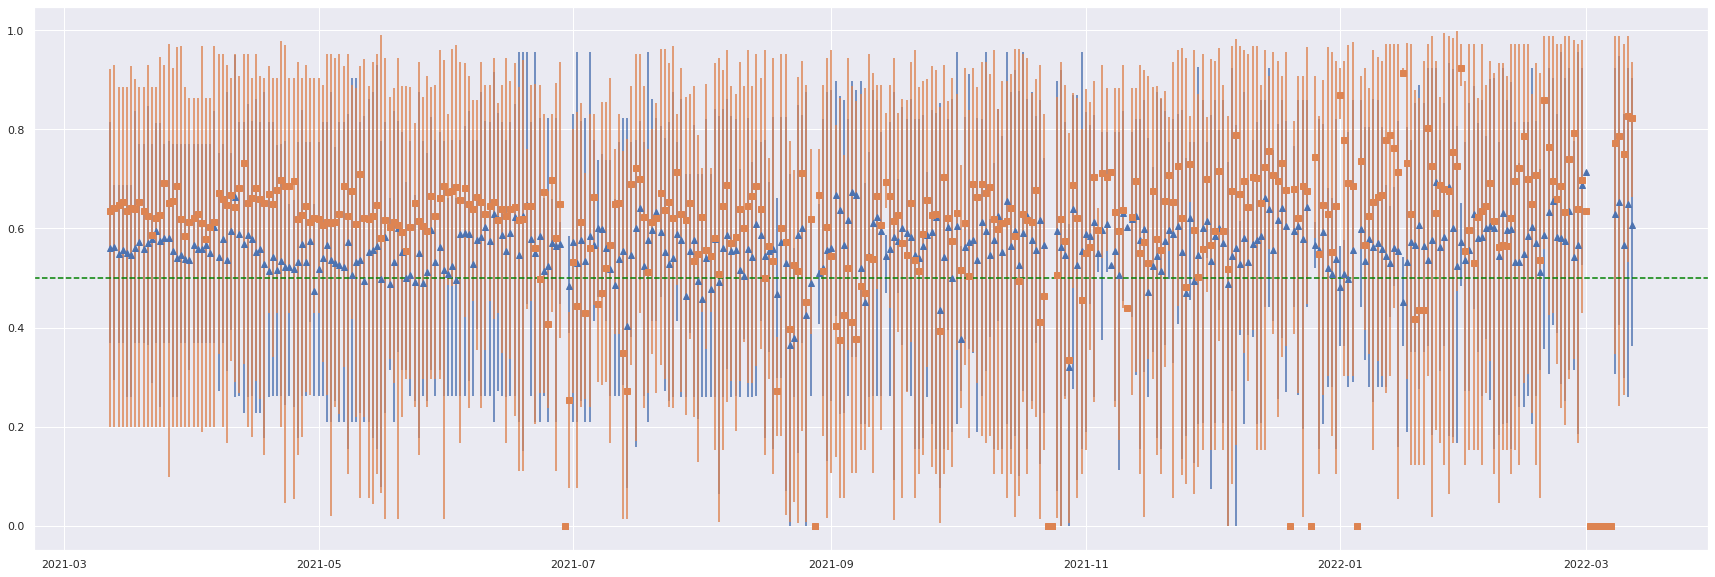

In [46]:
plt.rcParams["figure.figsize"] = (30,10)
plt.errorbar(e["date"],e["mean"], [e["mean"] - e['min'],e['max']-e["mean"]], linestyle='None',marker='^')
plt.errorbar(d["date"],d["mean"], [d["mean"] - d['min'],d['max']-d["mean"]], linestyle='None',marker='s')
plt.axhline(y=0.5, color='green', linestyle='dashed')
plt.show()

# 2. Feature Analysis

In this section, I will analyse the song features.

In [47]:
distinct_song = pd.read_csv('data/distinct_song.csv')
distinct_song = distinct_song.drop(columns=['Unnamed: 0'])

## Histogram

In [48]:
features = ['danceability', 'energy', 'key', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']

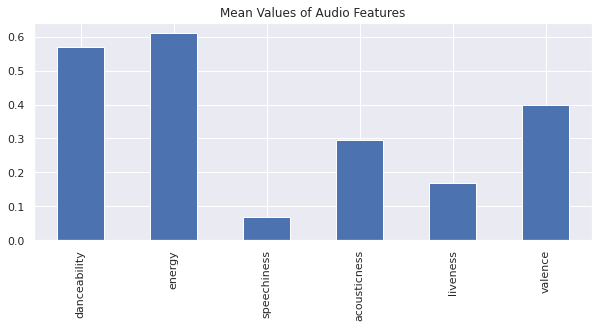

In [49]:
small = distinct_song[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

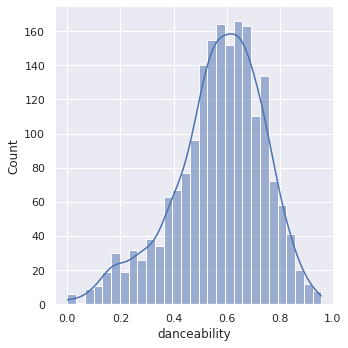

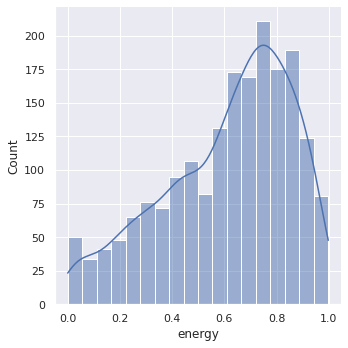

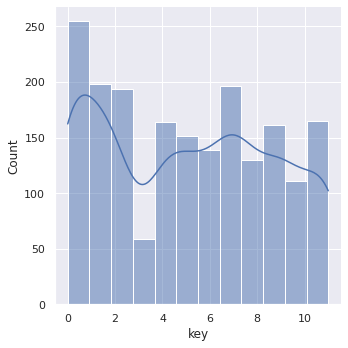

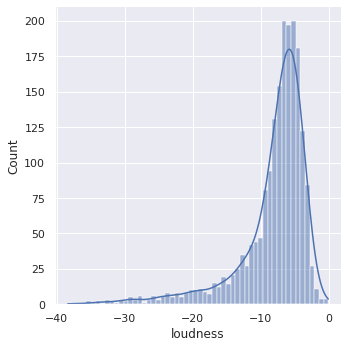

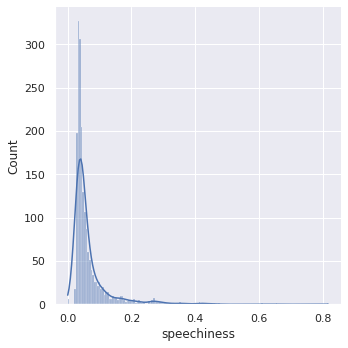

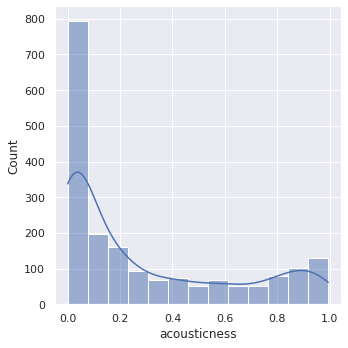

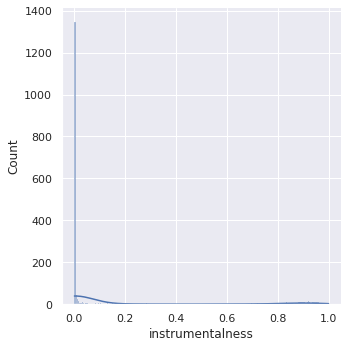

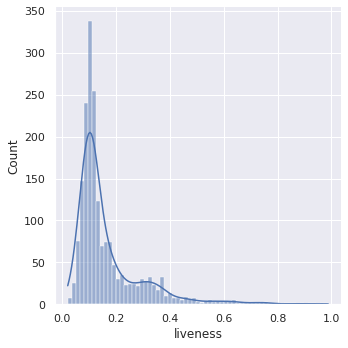

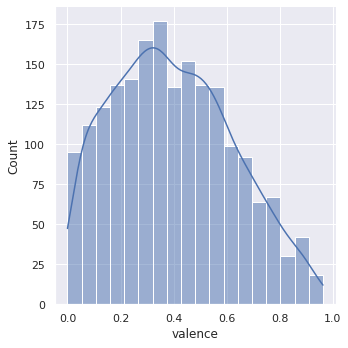

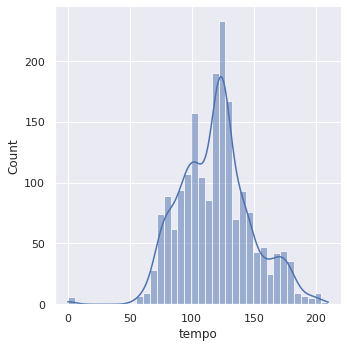

In [50]:
for col in features:
  sns.displot(distinct_song, x=col, kde=True)
  plt.show()

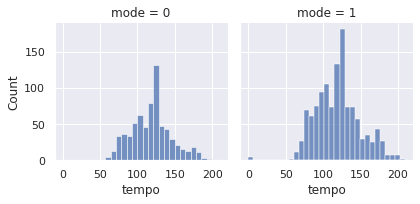

In [51]:
plt.rcParams['figure.figsize'] = (20,7)
g = sns.FacetGrid(distinct_song, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

<AxesSubplot:xlabel='key', ylabel='count'>

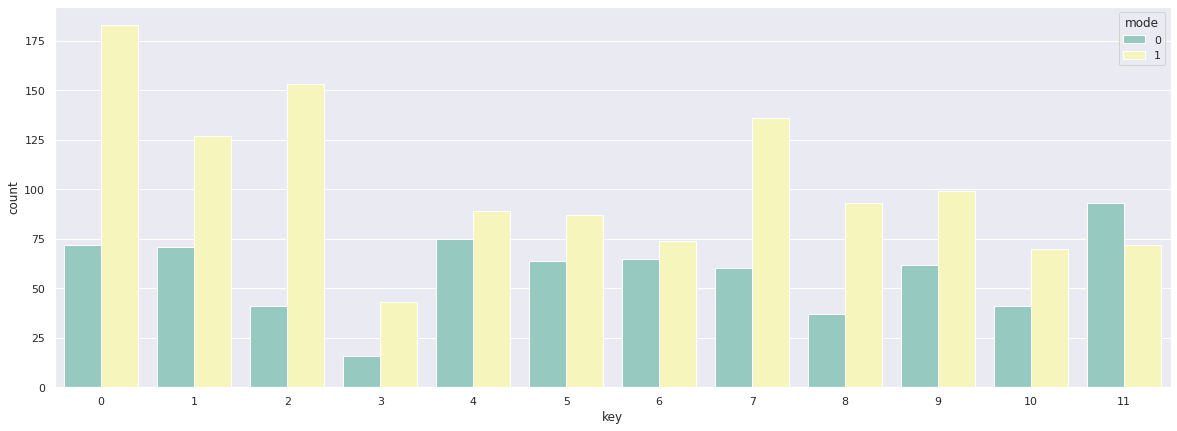

In [52]:
sns.countplot(data=distinct_song, x='key', hue='mode', palette = 'Set3')

## Heatmap

<AxesSubplot:>

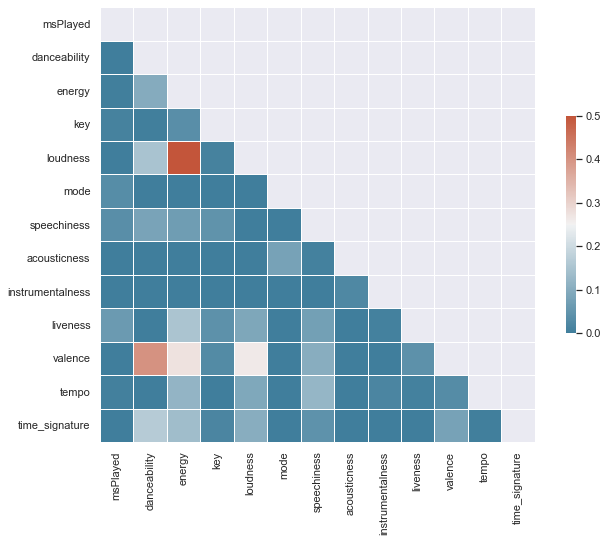

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(distinct_song.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(distinct_song.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the heatmap we can see that there is a huge correlation between:
- loudness X energy
- valence X danceability
- valence X energy
- valence X loudness

<AxesSubplot:xlabel='danceability', ylabel='tempo'>

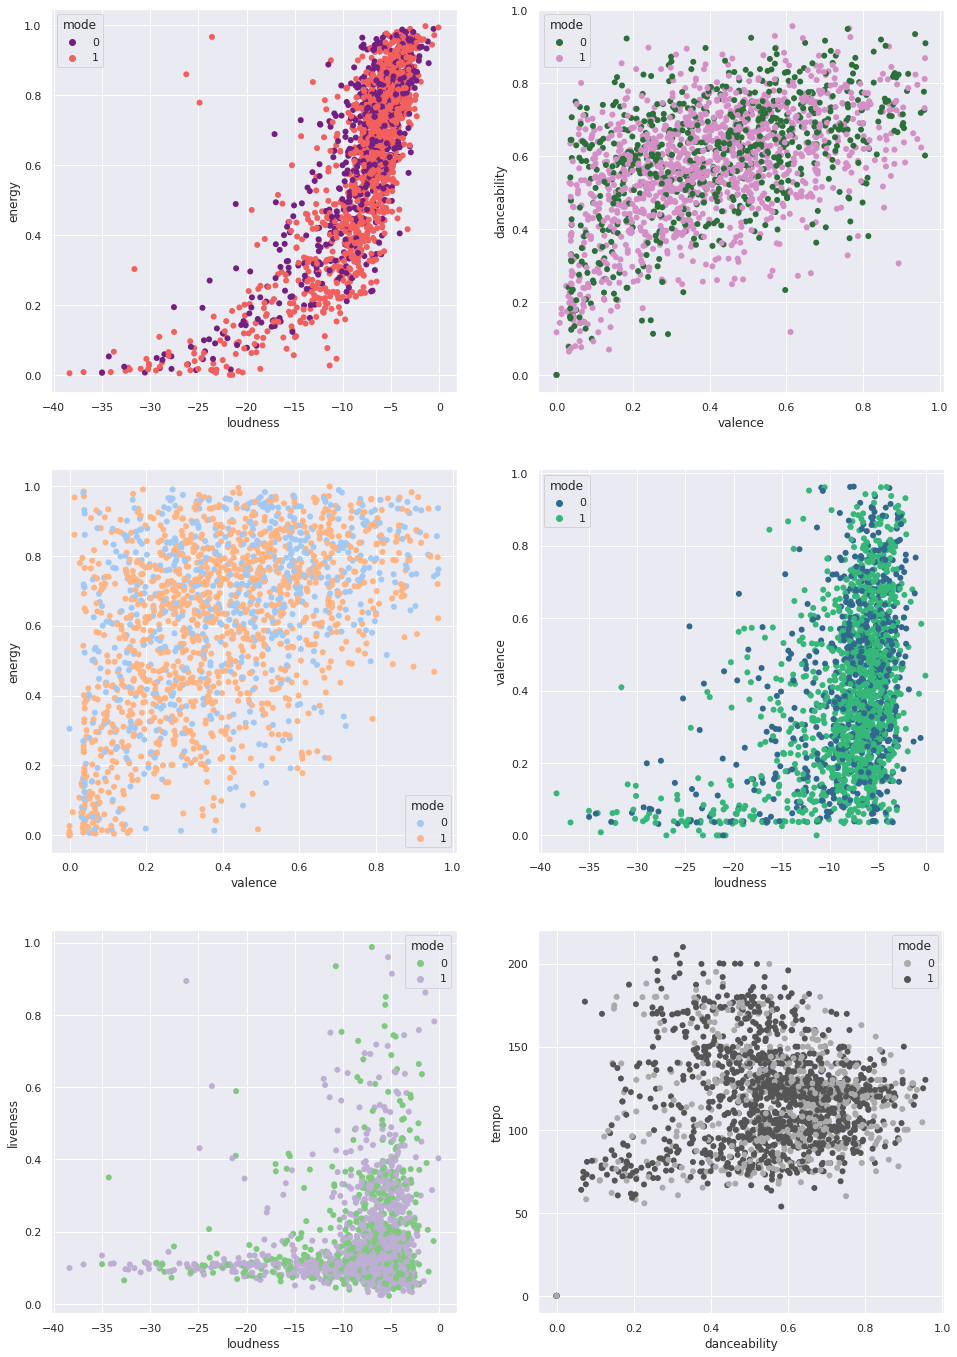

In [53]:
f, ax = plt.subplots(3,2, figsize=(16,24))

sns.scatterplot(x="loudness", y="energy",
                hue="mode", 
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[0][0])

sns.scatterplot(x="valence", y="danceability",
                hue="mode", 
                palette="cubehelix",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[0][1])

sns.scatterplot(x="valence", y="energy",
                hue="mode", 
                palette="pastel",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[1][0])

sns.scatterplot(x="loudness", y="valence",
                hue="mode", 
                palette="viridis",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[1][1])

sns.scatterplot(x="loudness", y="liveness",
                hue="mode", 
                palette="Accent",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[2][0])

sns.scatterplot(x="danceability", y="tempo",
                hue="mode", 
                palette="binary",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[2][1])

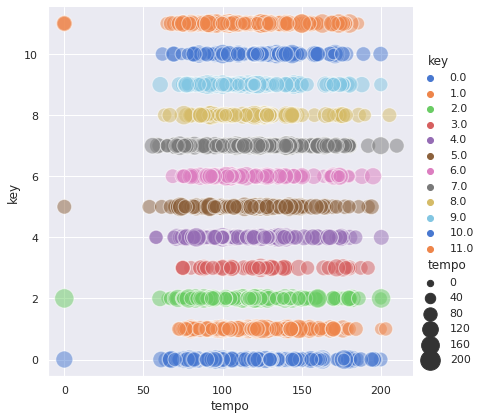

In [54]:
sns.relplot(x="tempo", y="key", hue="key", size=my_streaming['tempo'],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=distinct_song)

In [ ]:
table = pd.pivot_table(distinct_song,index=['artistName'], values = ['key'], aggfunc=np.mean)
table

,key
artistName,
$teev,1.0
2 Chainz,1.0
3LAU,4.2
5 Seconds of Summer,6.6
88rising,7.0
...,...
ricky retro,6.0
teamwork.,3.5
traila $ong,1.0


# 3. My Playlists Analysis

In [9]:
df = pd.read_csv('data/playlist_data.csv')
df.head(3)

,Unnamed: 0,list_name,song_id,song_name,artist,popularity,release_date,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key
0,0,My Playlist #4,0C47mkZ7VGcnKBvEG7PiAP,Abhi Na Jao Chhod Kar,Asha Bhosle,53.0,1961-01-01,0.421,0.3290,96.444,0.0355,0.607,0.187,0.521,255027.0,-9.856,0.551,1.0,3.0
1,1,My Playlist #4,7Hkbm2DgepcriVxDrwbCcc,Taarif Karoon,Mohammed Rafi,56.0,2019-05-16,0.681,0.1050,111.995,0.0464,0.352,0.000,0.796,157761.0,-6.067,0.795,1.0,5.0
2,2,My Playlist #4,0Fv1BhESkVabGfhPy3vDbV,Jane Kahan Mera Jigar Gaya Ji,Geeta Dutt,46.0,1955-01-01,0.532,0.0751,121.316,0.0590,0.877,0.000,0.917,218373.0,-5.145,0.977,1.0,6.0


## Comparing different playlists

In [10]:
from math import pi

In [11]:
radar = df.groupby('list_name')[['energy', 'danceability', 'valence', 'liveness', 'acousticness']].aggregate(np.mean)
radar.head(3)

,energy,danceability,valence,liveness,acousticness
list_name,,,,,
My Playlist #2,0.640500,0.689500,0.536500,0.21275,0.005191
My Playlist #4,0.544667,0.744667,0.774333,0.16970,0.612000
On Repeat,0.487833,0.598233,0.421013,0.13790,0.526140


In [12]:
playlist_names = radar.index.to_list()
playlist_names

['My Playlist #2', 'My Playlist #4', 'On Repeat']

## Different features of the Playlists

In [13]:
def plot_radar(idx,color):
  # categories
  category = ['energy', 'danceability', 'valence', 'liveness', 'acousticness']
  N = len(category)

  #values
  values = radar.iloc[idx].to_list()
  values += values[:1]

  # calculate angle for each category
  angles = [n / float(N) * 2 * pi for n in range(N) ]
  angles += angles[:1]

  # plot
  plt.polar(angles, values, marker = '.', color=color)
  plt.fill(angles, values, alpha=0.3, color=color)

  # x labels
  plt.xticks(angles[:-1], category)

  # y labels
  plt.yticks([0.2,0.4,0.6,0.8])
  plt.ylim(0,1)

In [14]:
color = ['crimson', 'teal', 'yellowgreen', 'gold', 'maroon', 'gray', 'lime', 'slateblue', 'chocolate', 'darkcyan']

IndexError: list index out of range

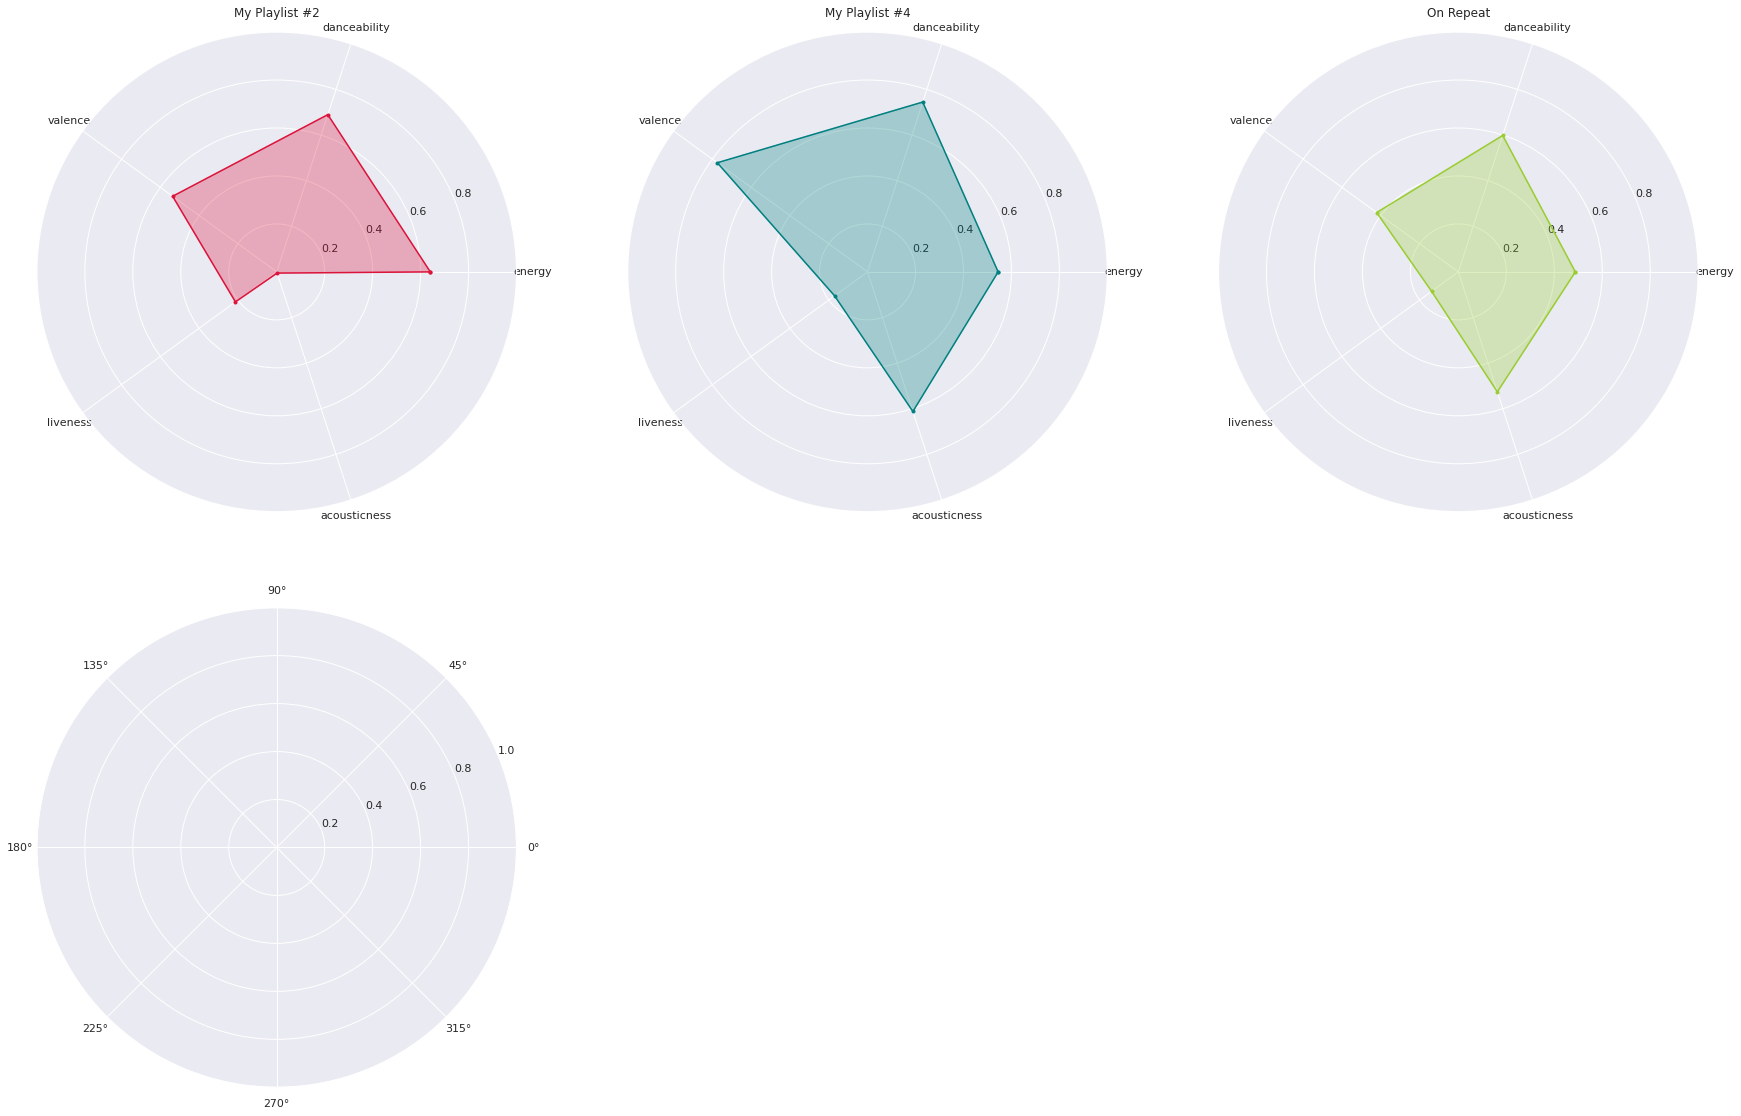

In [15]:
plt.rcParams['figure.figsize'] = (30,30)
for i in range(9):
  k = i+1
  ax = plt.subplot(int('33' + str(k)), polar='True')
  ax.title.set_text(playlist_names[i])
  plot_radar(i,color[i])

plt.show()

/home/abhinavgorantla/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38738 (\N{CJK UNIFIED IDEOGRAPH-9752}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/abhinavgorantla/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/abhinavgorantla/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26654 (\N{CJK UNIFIED IDEOGRAPH-681E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


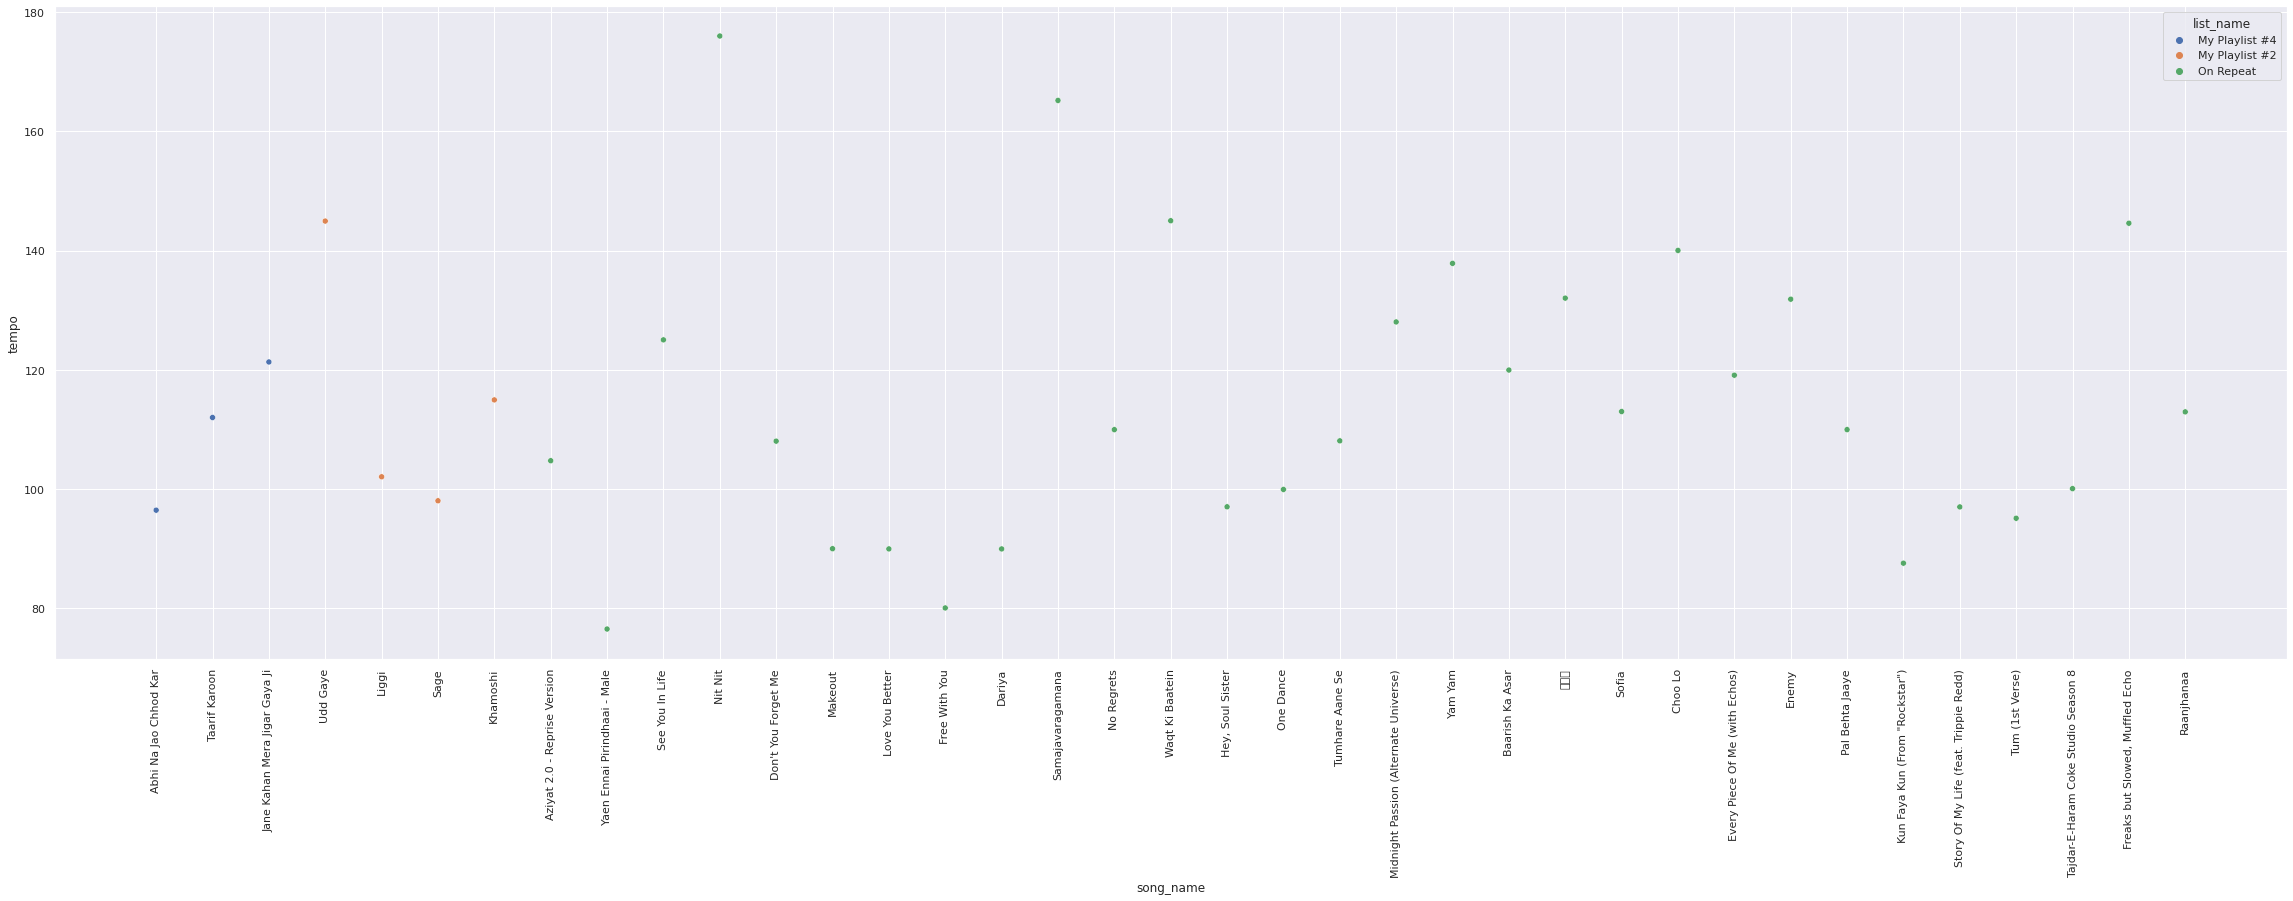

In [16]:
plt.rcParams['figure.figsize'] = (40,12)
sns.scatterplot(data=df, x='song_name', y='tempo', hue='list_name')
plt.xticks(rotation=90)
plt.show()

## Different songs as per year

In [17]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].apply(lambda x: x.year)

In [18]:
idx = pd.DataFrame(range(1971,2020),columns=['Release Year'])

# then merge the idx with df"release_year" that is just created
release_year = pd.merge(idx, df[['song_id', 'year']], how='left',left_on='Release Year',right_on = 'year', copy=False)

release_year.drop("year",inplace=True,axis=1)
release_year.head(3)

,Release Year,song_id
0,1971,NaN
1,1972,NaN
2,1973,NaN


In [19]:
release_year = release_year.groupby('Release Year', as_index=False)['song_id'].count()
release_year.head(3)

,Release Year,song_id
0,1971,0
1,1972,0
2,1973,0


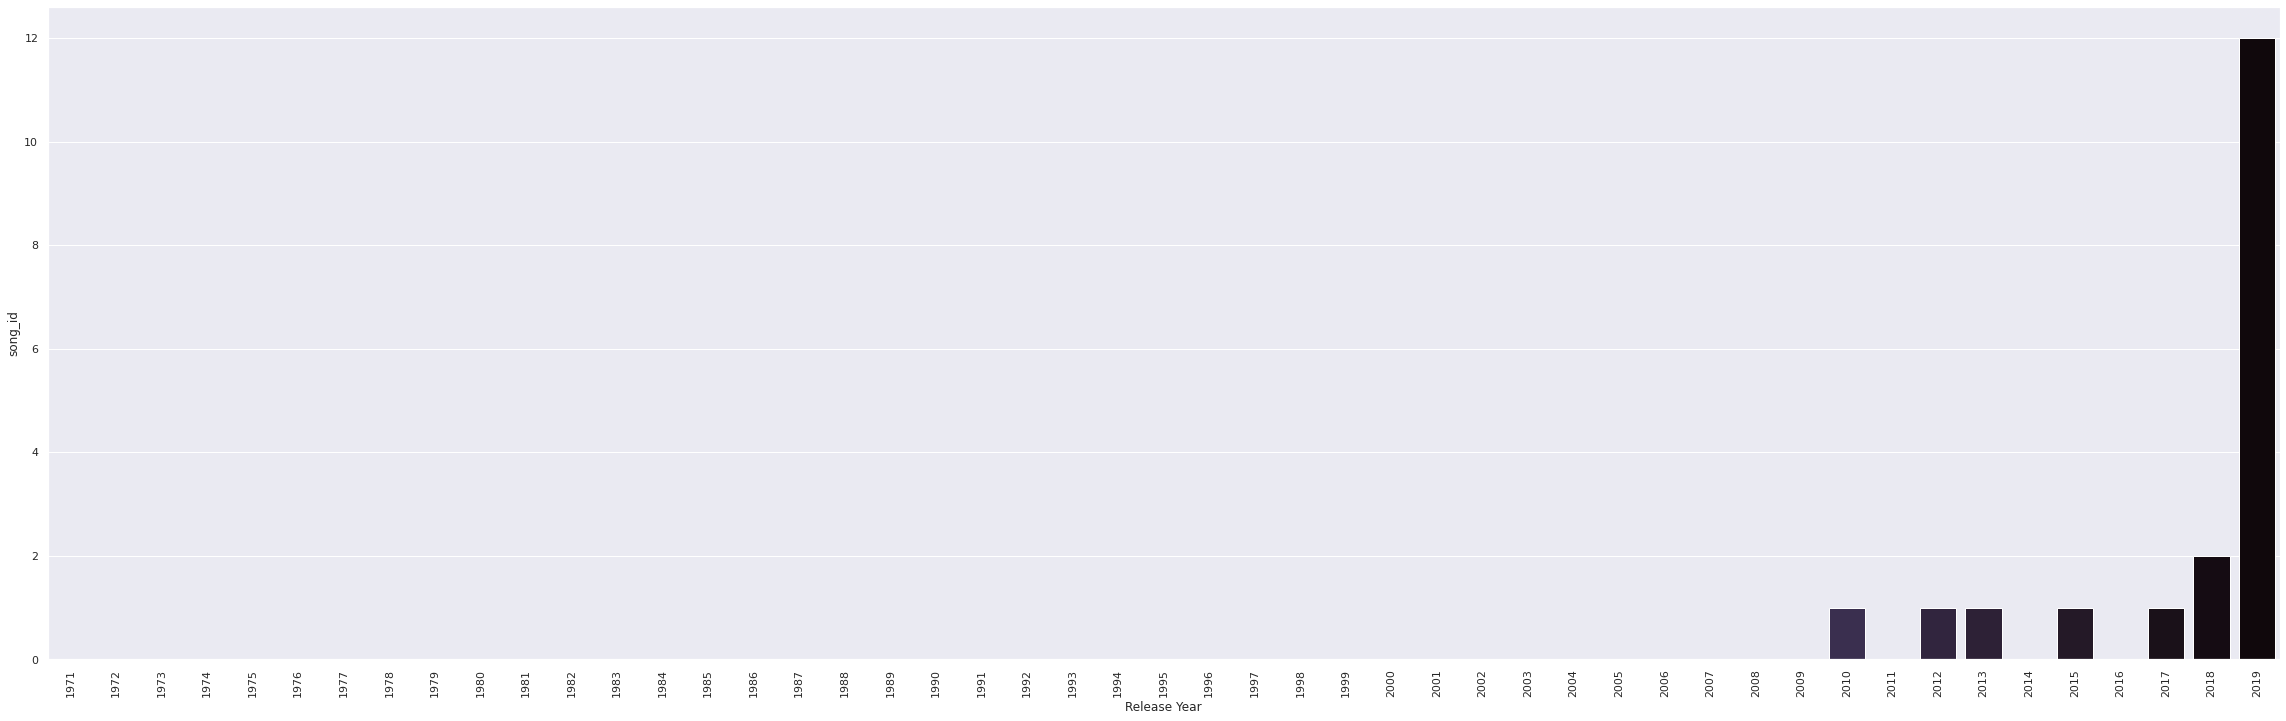

In [20]:
sns.barplot(data=release_year, x='Release Year', y='song_id', palette='mako_r')
plt.xticks(rotation=90)
plt.show()

Most of the songs I listen to are the recent ones

## Count of songs for each modes

In [21]:
key_mode = df.groupby(["key","mode"], as_index=False)["song_id"].count()
key_mode.head(3)

,key,mode,song_id
0,0.0,0.0,1
1,0.0,1.0,1
2,1.0,0.0,1


In [22]:
# map the key in number to the real key represented in alphabet
key_dic = {0: "C", 
           1: "C♯/D♭",
           2: "D",
           3: "D♯/E♭",
           4: "E",
           5: "F",
           6: "F♯/G♭",
           7: "G",
           8: "G♯/A♭",
           9: "A",
           10: "A♯/B♭",
           11: "B"}
key_mode = key_mode.replace({"key": key_dic})

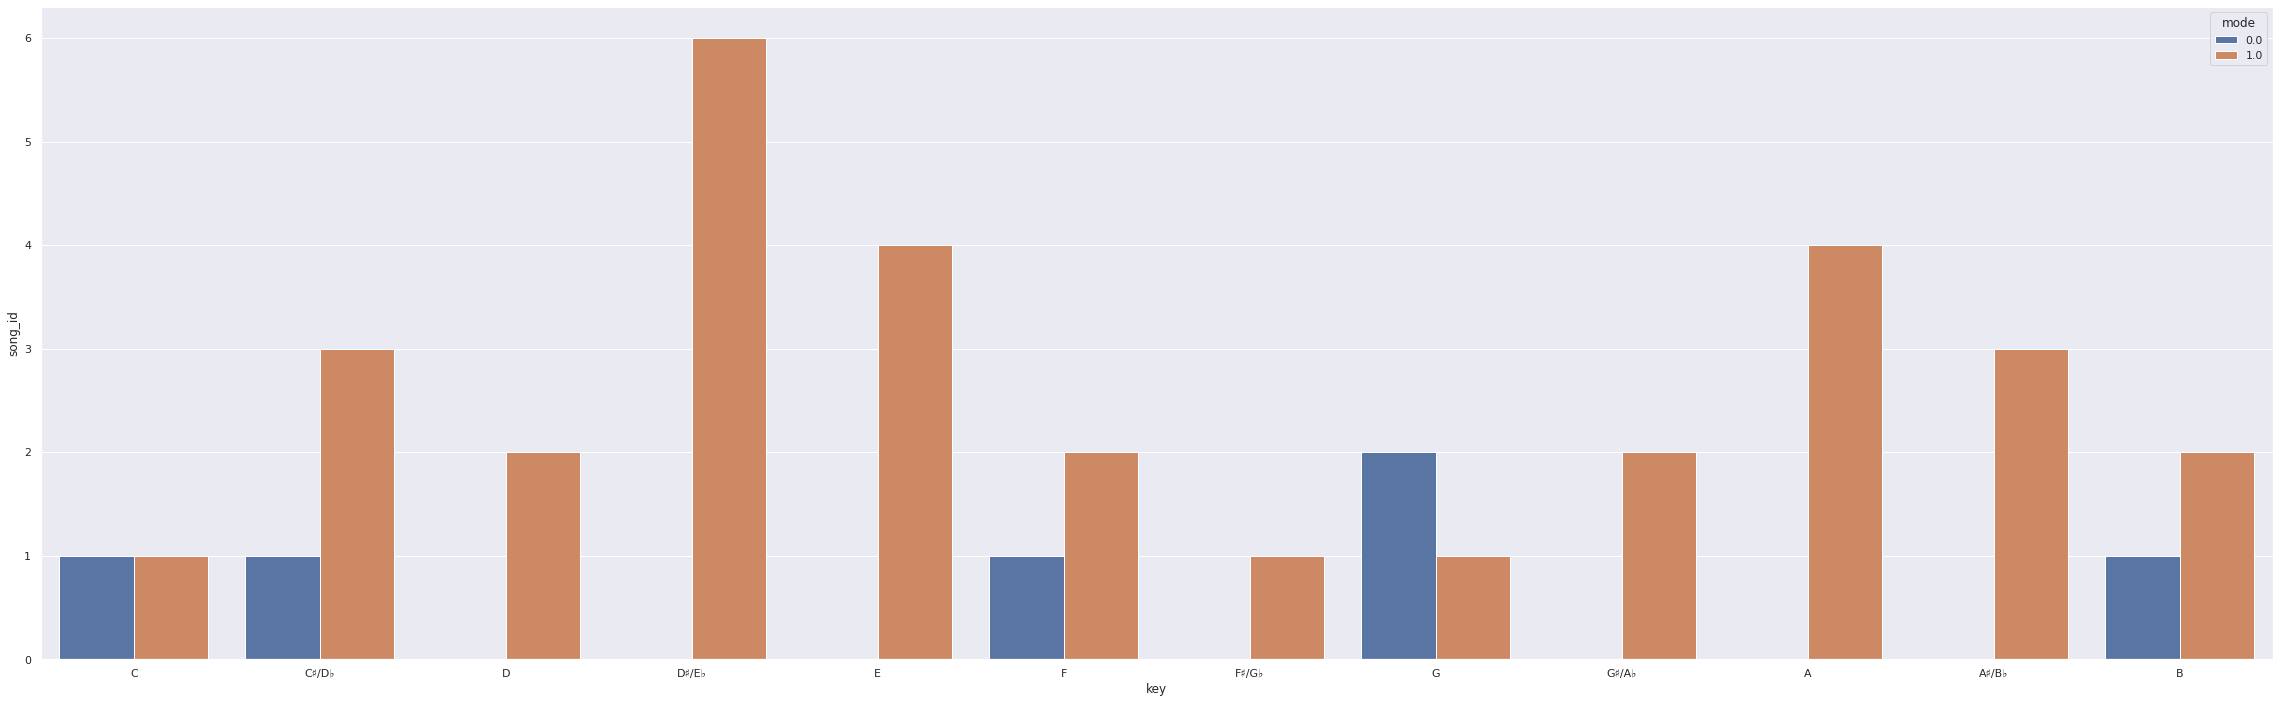

In [23]:
sns.barplot(data=key_mode, x='key', y='song_id', hue='mode')
plt.show()